# Exercise 2.1.1 Reading data from a file


## Name and describe pandas data structures.
* Series - 1D
* DataFrame - 2D
* Panel - 3D
![overview]("Images/Screenshot from 2022-11-11 10-11-23.png")

In [1]:
# todo I could add some basic slicing stuff or desciption stuff here

Load the data from the iris.tsv file into a pandas DataFrame.

In [15]:
import pandas as pd
import os

data_dir = "PycharmProjects/bioimaging_ws2223/Data"

In [18]:
data = pd.read_table(os.path.join(data_dir,"iris.tsv"))
print(f"data type after reading: {type(data)}")

print(f"Show the first 5 rows of the data: {data[:5]}\n  "
      f"Then show the last five rows of the data: {data[-5:]}")

data type after reading: <class 'pandas.core.frame.DataFrame'>
Show the first 5 rows of the data:    # sepal_length:lin  sepal_width:lin  petal_length:lin  petal_width:lin  \
0                 5.1              3.5               1.4              0.2   
1                 4.9              3.0               1.4              0.2   
2                 4.7              3.2               1.3              0.2   
3                 4.6              3.1               1.5              0.2   
4                 5.0              3.6               1.4              0.2   

     label:nom  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
  Then show the last five rows of the data:      # sepal_length:lin  sepal_width:lin  petal_length:lin  petal_width:lin  \
145                 6.7              3.0               5.2              2.3   
146                 6.3              2.5               5.0              1.9   
147                 6.5              3.0               5

In [31]:
print(f"the first 10 entries of the first column of the DataFrame using the label: {data[:10]['# sepal_length:lin']}")

print(f"the first 10 entries of the first column of the DataFrame using the index: {data.iloc[:10,0]}")

the first 10 entries of the first column of the DataFrame using the label: 0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: # sepal_length:lin, dtype: float64
the first 10 entries of the first column of the DataFrame using the index: 0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: # sepal_length:lin, dtype: float64


In [33]:
# Extract the Sepal.Length column and save in a variable. What’s the type of the data in the new variable?

sl = data['# sepal_length:lin']
type(sl)

pandas.core.series.Series

In [34]:
# Print out the first 5 entries of the first two columns.

print(data.iloc[0:5,0:2])
print(data[['# sepal_length:lin', 'sepal_width:lin']][:5])
print(data[:5][['# sepal_length:lin', 'sepal_width:lin']])

   # sepal_length:lin  sepal_width:lin
0                 5.1              3.5
1                 4.9              3.0
2                 4.7              3.2
3                 4.6              3.1
4                 5.0              3.6
   # sepal_length:lin  sepal_width:lin
0                 5.1              3.5
1                 4.9              3.0
2                 4.7              3.2
3                 4.6              3.1
4                 5.0              3.6
   # sepal_length:lin  sepal_width:lin
0                 5.1              3.5
1                 4.9              3.0
2                 4.7              3.2
3                 4.6              3.1
4                 5.0              3.6


In [35]:
# Print out the last 5 rows for Petal.Width and Species.

print(data[-5][['petal_width:lin','label:nom']])
# todo complete

KeyError: -5

In [36]:
# fill in stuff

## DataFrame and data summarization

In [37]:
# Get the minimum, maximum, mean and median petal width.
# todo

label:nom
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label:nom, dtype: int64


<AxesSubplot:>

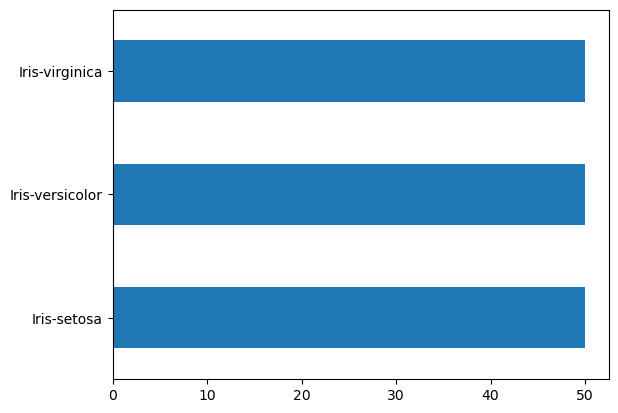

In [38]:
# Get the number of entries per species.
num_p_spec = data.groupby(['label:nom'])['label:nom'].count()
print(num_p_spec)

# Plot species count as barplot.
data['label:nom'].value_counts().plot(kind = 'barh')

In [41]:
# Get the mean petal width by species.
print(data.groupby('label:nom').mean()['petal_width:lin'])

label:nom
Iris-setosa        0.246
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width:lin, dtype: float64
                 # sepal_length:lin  sepal_width:lin  petal_length:lin  \
label:nom                                                                
Iris-setosa                   5.006            3.428             1.462   
Iris-versicolor               5.936            2.770             4.260   
Iris-virginica                6.588            2.974             5.552   

                 petal_width:lin  
label:nom                         
Iris-setosa                0.246  
Iris-versicolor            1.326  
Iris-virginica             2.026  


,# sepal_length:lin,sepal_width:lin,petal_length:lin,petal_width:lin
label:nom,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Filling-up a DataFrame

In [50]:
# Create a DataFrame with three columns species, height and weight and add an entry to the end.

## use append
df = pd.DataFrame(columns=('species','height','weight'))
print('empty ',df)
tmp_df = pd.DataFrame([['H.sapiens',184,132]], columns=('species','height','weight'))
#df = df.append(tmp_df, ignore_index=True)
df = pd.concat([df,tmp_df])
print(df)
del(tmp_df)

empty  Empty DataFrame
Columns: [species, height, weight]
Index: []
     species height weight
0  H.sapiens    184    132


In [45]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError wi

In [ ]:
## using loc

df = pd.DataFrame(columns=('species','height','weight'))
df.loc[0]
# todo complete

df_2.loc[df_2.index%2 != 0,'species'] = 'M.musculus'

In [51]:
# Save the DataFrame as a tsv file (tab separated values).

df.to_csv('tmp_dataframe.tsv', sep='\t', index=False)

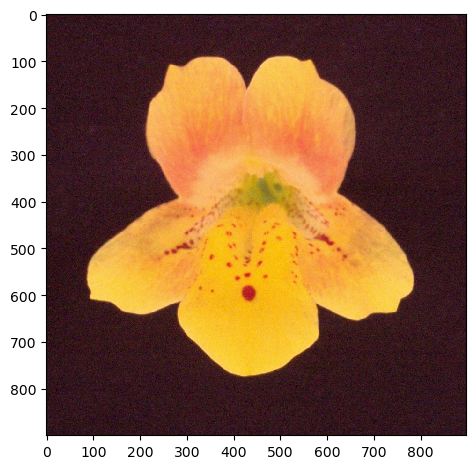

In [54]:
import skimage.io as io
im = io.imread(os.path.join(data_dir,"Mimulus-77.jpg"))
io.imshow(im)